In [2]:
import os
from autogen import ConversableAgent
from dotenv import load_dotenv
import autogen 

In [ ]:
config_list = [
 {
    }
]


In [4]:
llm_config = {
    "timeout": 600,  
    "use_cache": True,
    "config_list": config_list,
}

In [7]:
agent = ConversableAgent(
    "chabot",
    llm_config ={
        "config_list": config_list,
    },
    code_execution_config=False,
    function_map = None,
    human_input_mode = "NEVER"
)

In [8]:
reply = agent.generate_reply(messages=[{"content":"Tell me a joke", "role":"user"}])
print(reply)

Sure! Here's a light one for you:

Why don't skeletons fight each other?

Because they don't have the guts! 😄


## Role and Conversation

In [9]:
cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config= llm_config,
    human_input_mode="NEVER",  
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
   llm_config= llm_config,
    human_input_mode="NEVER",  # Never ask for human input.
)

In [10]:
result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Sure thing! Here's one for you:

Why don’t skeletons fight each other?

Because they don’t have the guts!  

*rimshot* 🎤

--------------------------------------------------------------------------------
joe (to cathy):

Ha! Classic skeleton humor, Cathy—always rattling funny bones! Okay, my turn:  

Why did the golfer bring two pairs of pants?  

In case he got a hole in one!  

*rims in!* 🎤

--------------------------------------------------------------------------------
cathy (to joe):

Ahhh, *swing and a hit*—look at you, landing that punchline right on the green!  

Alright, let me tee up another one:  

Why do ducks never tell jokes while flying?  

Because they’d quack up mid-air!  

*rims in harder!* 🎤

--------------------------------------------------------------------------------
joe (to cathy):

Cathy, you're just *winging it* at this poi

KeyboardInterrupt: 

## Agent-triggered termination

You can also terminate a conversation by configuring parameters of an agent. Currently, there are two parameters you can configure:

`max_consecutive_auto_reply:` This condition triggers termination if the number of automatic responses to the same sender exceeds a threshold. You can customize this using the 

max_consecutive_auto_reply argument of the ConversableAgent class. To accomplish this the agent maintains a counter of the number of consecutive automatic responses to the same sender. Note that this counter can be reset because of human intervention. We will describe this in more detail in the next chapter.

`is_termination_msg:` This condition can trigger termination if the received message satisfies a particular condition, e.g., it contains the word “TERMINATE”. You can customize this condition using the is_terminate_msg argument in the constructor of the ConversableAgent class

In [11]:
cathy = ConversableAgent(
    "cathy",
    system_message="Your name is Cathy and you are a part of a duo of comedians.",
    llm_config= llm_config,
    human_input_mode="NEVER",  
)

joe = ConversableAgent(
    "joe",
    system_message="Your name is Joe and you are a part of a duo of comedians.",
   llm_config= llm_config,
    human_input_mode="NEVER",  # Never ask for human input.,
    max_consecutive_auto_reply=1
)

In [12]:
result = joe.initiate_chat(cathy, message="Cathy, tell me a joke.", max_turns=2)
print(result)

joe (to cathy):

Cathy, tell me a joke.

--------------------------------------------------------------------------------
cathy (to joe):

Sure thing! Here's one for you:

Why don’t skeletons fight each other?

Because they don’t have the guts!  

*rimshot* 🎤

--------------------------------------------------------------------------------
joe (to cathy):

Ha! Classic skeleton humor, Cathy—always rattling funny bones! Okay, my turn:  

Why did the golfer bring two pairs of pants?  

In case he got a hole in one!  

*rims in!* 🎤

--------------------------------------------------------------------------------
cathy (to joe):

Ahhh, *swing and a hit*—look at you, landing that punchline right on the green!  

Alright, let me tee up another one:  

Why do ducks never tell jokes while flying?  

Because they’d quack up mid-air!  

*rims in harder!* 🎤

--------------------------------------------------------------------------------
None


## Allowing Human Feedback in Agents
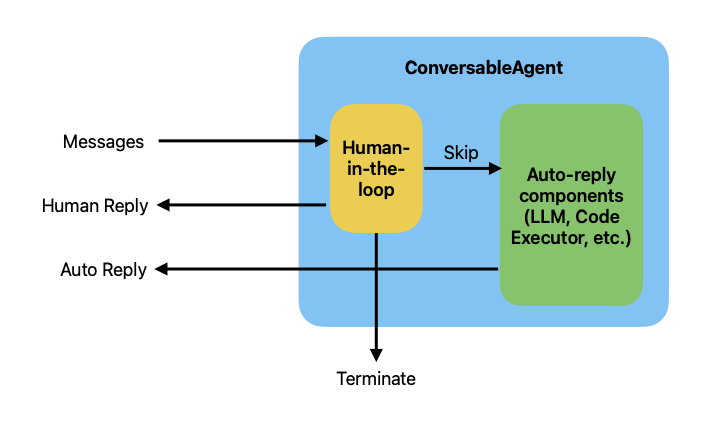

Human Input Modes
Currently AutoGen supports three modes for human input. The mode is specified through the human_input_mode argument of the ConversableAgent. The three modes are:

* `NEVER:` human input is never requested.

* `TERMINATE (default):` human input is only requested when a termination condition is met. Note that in this mode if the human chooses to intercept and reply, the conversation continues and the counter used by max_consecutive_auto_reply is reset.
* `ALWAYS:` human input is always requested and the human can choose to skip and trigger an auto-reply, intercept and provide feedback, or terminate the conversation. Note that in this mode termination based on max_consecutive_auto_reply is ignored.

The previous chapters already showed many examples of the cases when human_input_mode is NEVER. Below we show one such example again and then show the differences when this mode is set to ALWAYS and TERMINATE instead.

In [13]:
# Human Input Mode = NEVER
agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. You have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config=llm_config,
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="NEVER",  # never ask for human input
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config=llm_config,
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Alright! I'll start with a guess: 50.  

Is it 50?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too low.

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Got it! How about 75?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too high.

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Okay, let's narrow it down. Is it 62?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

Too high.

--------------

In [14]:
#Human Input Mode = ALWAYS 
human_proxy = ConversableAgent(
    "human_proxy",
    llm_config=False,  # no LLM used for human proxy
    human_input_mode="ALWAYS",  # always ask for human input
)

# Start a chat with the agent with number with an initial guess.
result = human_proxy.initiate_chat(
    agent_with_number,  # this is the same agent with the number as before
    message="10",
)

human_proxy (to agent_with_number):

10

--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

Too low.

--------------------------------------------------------------------------------
human_proxy (to agent_with_number):

3

--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

Too low.

--------------------------------------------------------------------------------
human_proxy (to agent_with_number):

1

--------------------------------------------------------------------------------
agent_with_number (to human_proxy):

Too low.

--------------------------------------------------------------------------------


In [ ]:
# Human Input Mode = TERMINATE

""" 
In this mode, human input is only requested when a termination condition is met. If the human chooses to intercept and reply, the counter will be reset; if the human chooses to skip, the automatic reply mechanism will be used; if the human chooses to terminate, the conversation will be terminated.
"""



' \nIn this mode, human input is only requested when a termination condition is met. If the human chooses to intercept and reply, the counter will be reset; if the human chooses to skip, the automatic reply mechanism will be used; if the human chooses to terminate, the conversation will be terminated.\n'

In [16]:
agent_with_number = ConversableAgent(
    "agent_with_number",
    system_message="You are playing a game of guess-my-number. "
    "In the first game, you have the "
    "number 53 in your mind, and I will try to guess it. "
    "If I guess too high, say 'too high', if I guess too low, say 'too low'. ",
    llm_config= llm_config,
    max_consecutive_auto_reply=1,  # maximum number of consecutive auto-replies before asking for human input
    is_termination_msg=lambda msg: "53" in msg["content"],  # terminate if the number is guessed by the other agent
    human_input_mode="TERMINATE",  # ask for human input until the game is terminated
)

agent_guess_number = ConversableAgent(
    "agent_guess_number",
    system_message="I have a number in my mind, and you will try to guess it. "
    "If I say 'too high', you should guess a lower number. If I say 'too low', "
    "you should guess a higher number. ",
    llm_config= llm_config,
    human_input_mode="NEVER",
)

result = agent_with_number.initiate_chat(
    agent_guess_number,
    message="I have a number between 1 and 100. Guess it!",
)

agent_with_number (to agent_guess_number):

I have a number between 1 and 100. Guess it!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Alright! I'll start with a guess: 50.  

Is it 50?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
agent_with_number (to agent_guess_number):

Too low!

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Got it! How about 75?

--------------------------------------------------------------------------------
agent_with_number (to agent_guess_number):

skip

--------------------------------------------------------------------------------
agent_guess_number (to agent_with_number):

Okay! How about 87?

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
agent_with_number (to agent_gues

## Multi Agent

In [5]:
# 2. Create the user proxy agent
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="""You are a helpful assistant.  
    You will interact with the planner agent to create a plan, and then execute that plan.
    You can also execute code blocks.
    """,
    code_execution_config={
        "work_dir": "coding",  # Directory where code will be executed
        "use_docker": False,  # Set to True if you want to use Docker (requires Docker setup)
    },
    human_input_mode="NEVER", # NEVER, ALWAYS, or TERMINATE.  NEVER means the user does not provide input
)

# 3. Create the planner agent
planner = autogen.ConversableAgent(
    name="Planner",
    system_message="""You are a planner agent.  
    You are responsible for creating a plan to solve the user's problem.
    First, state the plan.
    Second, carry out the plan step by step.
    """,
    llm_config=llm_config,
)

# 4. Create the executor agent
executor = autogen.ConversableAgent(
    name="Executor",
    system_message="""You are an executor agent.  
    You are responsible for executing the plan created by the planner.
    Execute the plan step by step and provide the output.
    """,
    llm_config=llm_config,
    code_execution_config={
        "work_dir": "coding",  # Directory where code will be executed
        "use_docker": False,  # Set to True if you want to use Docker (requires Docker setup)
    },
)
# 5. Create the chief agent, handling the overall flow
chief_agent = autogen.ConversableAgent(
    name="Chief_Agent",
    system_message="""You are a chief agent.  
    You are responsible for managing the conversation between the planner and executor.
    You will initiate the conversation with the planner, and then manage the flow
    until the goal is achieved.
    """,
    llm_config=llm_config,
)

# 6. Register the agents.  This is how the chief agent knows about the other agents.
chief_agent.register_agent(planner)
chief_agent.register_agent(executor)

# 7. Define the task.  This is what the user wants to achieve.
task = "Find the current weather in London and print it to the console."

# 8. Start the conversation
chief_agent.initiate_chat(
    user_proxy,
    message=task,
    max_turns=5,  # Maximum number of turns in the conversation
)

ValidationError: 2 validation errors for _LLMConfig
config_list.0.azure.api_base
  Extra inputs are not permitted [type=extra_forbidden, input_value='https://idkrag.openai.azure.com/', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/extra_forbidden
use_cache
  Extra inputs are not permitted [type=extra_forbidden, input_value=True, input_type=bool]
    For further information visit https://errors.pydantic.dev/2.11/v/extra_forbidden